In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib

from Bio import SeqIO
from matplotlib import pyplot as plt
from os import path
from scipy.stats import binom
from utils import qual_palette

In [3]:
# Genome and pool data filenames
genome_fname = "../data/berkeleylab-feba-7de9bcaf0960/bin/g/Halo/genome.fna"
pool_fname1 = "../data/HnTnSeqAnalysis/DSJD02HTn1_R1/DSJDo2Htn1_S1_l006_R1_001.pool"
pool_fname2 = "../data/HnTnSeqAnalysis/DSJD03Htn2_R1/DSJD03Htn2_S2_l006_R1_001.pool"

gene_stats_fname1 = '../data/HnTnSeqAnalysis/geneStatsRep1.csv'
gene_stats_fname2 = '../data/HnTnSeqAnalysis/geneStatsRep2.csv'

# DataFrames for pool and gene data
pool_df1 = pd.read_csv(pool_fname1, sep='\t')
pool_df2 = pd.read_csv(pool_fname2, sep='\t')
rep_df1 = pd.read_csv(gene_stats_fname1)
rep_df2 = pd.read_csv(gene_stats_fname2)

# DataFrame for essentiality calls 
essentiality_fname = '../data/essentiality_calls.csv'
essentiality_df = pd.read_csv(essentiality_fname)

# Grab genome length
genome_size_bp = None
for req in SeqIO.parse(genome_fname, "fasta"):
    genome_size_bp = len(req)

In [5]:
# When we are plotting the library we want to include insertions mapped in either replicate.
# Therefore we merge the two dataframes. 
merge_on = pool_df1.columns.tolist()
total_pool_df = pool_df1.merge(pool_df2, on=merge_on, how='outer')

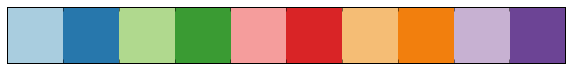

In [6]:
sns.palplot(qual_palette)

In [ ]:
def makeFig2S1():
    import pandas as pd
    pathToData = "./../RB-TnSeq/2017_11_03_miseq_barSeq1/"
    logratios_df1 = pd.read_csv(path.join(pathToData, 'fit_logratios.tab'), sep='\t')
    tValues_df1 = pd.read_csv(path.join(pathToData, 'fit_t.tab'), sep='\t')
    pathToData = "./../RB-TnSeq/2017_11_03_miseq_barseq2/"
    logratios_df2 = pd.read_csv(path.join(pathToData, 'fit_logratios.tab'), sep='\t')
    tValues_df2 = pd.read_csv(path.join(pathToData, 'fit_t.tab'), sep='\t')
    

In [ ]:
# Making Panel D
%matplotlib inline
def makePanelD(ax):
    import adjustText

    import seaborn as sns
    cols = ['#56AC52','#337848','#F2E92A','#F58320','#822F31','#CC3C39','#475BA6','#78CDDA','#5375BA','#EA3C81'
            ,'#7E441D','#848585','#8E5EA7','#B9D36C','#000000']
    colors = sns.color_palette(cols)    
#     iCol=colors[3] #in operon
    iCol=colors[9] #in operon
    eCol=colors[4]  #known CCM genes
    nCol=colors[7] #known non-CCM genes
    aCol=colors[6]  #out of operon
    
    import pandas as pd
    import numpy as np
    from os import path

    
    pathToData = "./../RB-TnSeq/2017_11_03_miseq_barSeq1/"
    gene_counts_df = pd.read_csv(path.join(pathToData, 'all.poolcount'), sep='\t')
    logratios_df = pd.read_csv(path.join(pathToData, 'fit_logratios.tab'), sep='\t')
    tValues_df = pd.read_csv(path.join(pathToData, 'fit_t.tab'), sep='\t')
    smaller_df = pd.DataFrame()
    smaller_df["barcode"] = gene_counts_df["barcode"]
    smaller_df["locusId"] = gene_counts_df["locusId"]
    smaller_df["Initial"] = gene_counts_df["test.S1"]
    smaller_df["HighCO2"] = gene_counts_df["test.S2"]
    smaller_df["LowCO2"] = gene_counts_df["test.S3"]

    # smaller_df
    small_log_df = pd.DataFrame()
    small_t_df = pd.DataFrame()
    small_log_df["locusId"] = logratios_df["locusId"]
    small_log_df["sysName"] = logratios_df["sysName"]
    small_log_df["desc"] = logratios_df["desc"]
    small_log_df["HighCO2Log"] = logratios_df["setAS2 HCO"]
    small_log_df["LowCO2Log"] = logratios_df["setAS3 LCO"]

    small_t_df["locusId"] = tValues_df["locusId"]
    small_t_df["HighCO2T"] = tValues_df["setAS2 HCO"]
    small_t_df["LowCO2T"] = tValues_df["setAS3 LCO"]
    
    geneLocs_df = pd.read_csv(path.join(pathToData, 'genes'), sep='\t')
#     cbbLocus_df = geneLocs_df[(geneLocs_df.begin>(983926-10000))&(geneLocs_df.begin<(983926+10000))]
    cbbLocus_df = geneLocs_df[(geneLocs_df.begin>(971679-100))&(geneLocs_df.begin<(989858+100))]



    testStatiscticsRep1 = pd.merge(small_log_df, small_t_df, how='left', on='locusId')
    
    pathToData = "./../RB-TnSeq/2017_11_03_miseq_barseq2/"
    gene_counts_df = pd.read_csv(path.join(pathToData, 'all.poolcount'), sep='\t')
    logratios_df = pd.read_csv(path.join(pathToData, 'fit_logratios.tab'), sep='\t')
    tValues_df = pd.read_csv(path.join(pathToData, 'fit_t.tab'), sep='\t')
    smaller_df = pd.DataFrame()
    smaller_df["barcode"] = gene_counts_df["barcode"]
    smaller_df["locusId"] = gene_counts_df["locusId"]
    smaller_df["Initial"] = gene_counts_df["test.S1"]
    smaller_df["HighCO2"] = gene_counts_df["test.S2"]
    smaller_df["LowCO2"] = gene_counts_df["test.S3"]

    # smaller_df
    small_log_df = pd.DataFrame()
    small_t_df = pd.DataFrame()
    small_log_df["locusId"] = logratios_df["locusId"]
    small_log_df["sysName"] = logratios_df["sysName"]
    small_log_df["desc"] = logratios_df["desc"]
    small_log_df["HighCO2Log"] = logratios_df["setAS2 HCO"]
    small_log_df["LowCO2Log"] = logratios_df["setAS3 LCO"]

    small_t_df["locusId"] = tValues_df["locusId"]
    small_t_df["HighCO2T"] = tValues_df["setAS2 HCO"]
    small_t_df["LowCO2T"] = tValues_df["setAS3 LCO"]

    testStatiscticsRep2 = pd.merge(small_log_df, small_t_df, how='left', on='locusId')
    
    means=pd.concat([testStatiscticsRep1,testStatiscticsRep2]).groupby('locusId').mean()
#     print(means.head(10))
#     print(means.loc['HNEAP_RS04625'])
    

    labeled_stuff = [
        ('HNEAP_RS04625', 'Csos1A',0.11,-4.5),
        ('HNEAP_RS04620', 'Csos1B',-0.1,-1.6),
        ('HNEAP_RS04630', 'Csos1C',0,-7),
        ('HNEAP_RS04635', 'Csos4B',0.1,-5.9),
        ('HNEAP_RS04640', 'Csos4A',-1.5,-6.5),
        ('HNEAP_RS04650', 'Csos2',0.1,-6.4),
        ('HNEAP_RS04660', 'CbbL',-0.9,-5.2),
        ('HNEAP_RS04655', 'CbbS',0,-4.1),
        ('HNEAP_RS04645', 'CsosCA',0.15,-5),
        ('HNEAP_RS04565','Csos1D',-0.05,-1.15),
        ('HNEAP_RS01030','DabAB2',0.1,-3.3),
#         ('HNEAP_RS01035','DabB2',1,1),
        ('HNEAP_RS01040','LysR',0.15,-2.6),
        ('HNEAP_RS04615','acRAF',-1.5,-4), #Pterin-4a-carbinolamine dehydratase
        ('HNEAP_RS05490','LysR',-0.8,-6),
        ('HNEAP_RS07320','Crp/Fnr',0,-2.1),
        ('HNEAP_RS04585','DabAB1',-1.5,-2.1),
#         ('HNEAP_RS04595','DabB1',1,1),
#         ('HNEAP_RS05865','TPR_16',1,1),#Tetratricopeptide TPR_2 repeat protein
    #     'HNEAP_RS05380':'Lytic transglycosylase catalytic',
    #     'HNEAP_RS08465':'N-acetylmuramyl-L-alanine amidase, negative regulator of AmpC, AmpD'
    ]

    for gene,label,x,y in labeled_stuff:
        plt.text(x,y,label,fontsize=26)
    
# #     print(means)
    
    cbbLoc_toPlot = means[means.index.isin(cbbLocus_df.locusId)]

#     print(means)
    
    plt.scatter(means.HighCO2Log, means.LowCO2Log, c=aCol,edgecolors='k', s=100,
                label='Outside operon')
    plt.scatter(cbbLoc_toPlot.HighCO2Log, cbbLoc_toPlot.LowCO2Log, c=iCol,edgecolors='k', s=100,
                label='In extended operon')

    
    matplotlib.rcParams.update({'font.size': 30})
    
    
    
#     plt.scatter(means.HighCO2Log, means.LowCO2Log, c='g',edgecolors='k', s=100)
    
    plt.xlabel('Fitness in 5% CO$_2$')
    plt.ylabel('Fitness in Ambient CO$_2$')
    plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                    length=10, width=4)
        # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
#     change axis weight
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    locs,labels = plt.xticks()
    ticks=['2$^{'+str(int(x))+'}$' for x in locs]
    plt.xticks(locs,ticks)#,rotation=45)
    locs,labels = plt.yticks()
    ticks=['2$^{'+str(int(x))+'}$' for x in locs]
    plt.yticks(locs,ticks)
        
   
fig,ax = plt.subplots(figsize=(10,10), frameon=False)
makePanelD(ax)
plt.savefig('./FigureMakingForBarseqDABPaper/figsForPaper/fig2PanelB.eps',format='eps',bbox_inches='tight')
plt.show()

In [ ]:
# Making Panel C
%matplotlib inline
import matplotlib.pyplot as plt

def makePanelC(ax):
    import pandas as pd
    import numpy as np
    import matplotlib as mpl
    from os import path
    import matplotlib.pyplot as plt
    from matplotlib import scale as mscale
    from matplotlib import transforms as mtransforms
    import matplotlib.cm as cm

    import seaborn as sns

    cols = ['#56AC52','#337848','#F2E92A','#F58320','#822F31','#CC3C39','#475BA6','#78CDDA','#5375BA','#EA3C81'
            ,'#7E441D','#848585','#8E5EA7','#B9D36C','#000000']
    colors = sns.color_palette(cols)    
#     iCol=colors[0] #non-CCM genes
#     eCol=colors[4]  #known CCM genes
#     nCol=colors[7] #known non-CCM genes
#     aCol=colors[6]  #new genes
    
    insertColor=colors[0]
    essentialColor=colors[4]
    nonEssentialColor=colors[5]
    aCol=colors[6]

    window_size = 300
    pool_f = open("./../RB-TnSeq/2017_11_03_miseq_barSeq1/EnrichmentWWindow"+str(window_size), "r")
    pool_df = pd.read_table(pool_f,sep=',')
    pool_f.close()
    pool_dropped_df =  pool_df.dropna()
    
    
    inserts_f = open("./../RB-TnSeq/2017_11_03_miseq_barSeq1/all.poolcount", "r")
    inserts_df = pd.read_table(inserts_f)
    inserts_f.close()
    
    inserts_dropped_df = inserts_df.dropna(subset=['pos'])
#     nMax=1.2
#     nMin=3.4
#     oMax=max(pool_dropped_df['val'])
#     oMin=min(pool_dropped_df['val'])
#     roll=((pool_dropped_df['val']-oMin)/(oMax-oMin))*(nMax-nMin)+nMin
#     zero=((0-oMin)/(oMax-oMin))*(nMax-nMin)+nMin
#     pool_dropped_df['val']=roll

    rep1 = pd.read_csv('./HnTnSeqAnalysis/geneStatsRep1.csv')
    pathToData = "./../RB-TnSeq/2017_11_03_miseq_barSeq1/"
    logratios_df = pd.read_csv(path.join(pathToData, 'fit_logratios.tab'), sep='\t')
    # smaller_df
    small_log_df = pd.DataFrame()
    small_log_df["locusId"] = logratios_df["locusId"]
    small_log_df["sysName"] = logratios_df["sysName"]
    small_log_df["desc"] = logratios_df["desc"]
    small_log_df["HighCO2Log"] = logratios_df["setAS2 HCO"]
    small_log_df["LowCO2Log"] = logratios_df["setAS3 LCO"]
    small_log_df['enrichment']=small_log_df.LowCO2Log-small_log_df.HighCO2Log
    
    height=1
#     region=[(983594-13000,986794+8000),(216936-3000,219419+6000)]
    
    region=[(983594-14000,986794+11000),(216936-6000,219419+9000)]
#     print(rep1)
    region.sort()
    print(region)
    positions=[]
    for reg in region:
    #     print(reg)
        positions.extend(list(range(reg[0],reg[1])))
        positions.extend([np.nan]*50)
    positions=np.array(positions)
    positions_dropped = positions[~np.isnan(positions)]

    
    def CustomScaleFactory(l, u):
        class CustomScale(mscale.ScaleBase):
            name = 'custom'

            def __init__(self, axis, **kwargs):
                mscale.ScaleBase.__init__(self)
                self.thresh = None #thresh

            def get_transform(self):
                return self.CustomTransform(self.thresh)

            def set_default_locators_and_formatters(self, axis):
                pass

            class CustomTransform(mtransforms.Transform):
                input_dims = 1
                output_dims = 1
                is_separable = True
                lower = l
                upper = u
                def __init__(self, thresh):
                    mtransforms.Transform.__init__(self)
                    self.thresh = thresh

                def transform_non_affine(self, a):
                    aa=np.array(a)
                    aaa = np.array(a)
                    aaa[aa>self.lower] = aa[aa>self.lower]-(self.upper-self.lower)
                    aaa[(aa>self.lower)&(aa<self.upper)] = self.lower
                    return aaa

                def inverted(self):
                    return CustomScale.InvertedCustomTransform(self.thresh)

            class InvertedCustomTransform(mtransforms.Transform):
                input_dims = 1
                output_dims = 1
                is_separable = True
                lower = l
                upper = u

                def __init__(self, thresh):
                    mtransforms.Transform.__init__(self)
                    self.thresh = thresh

                def transform(self, a):
                    aa=np.array(a)
                    aaa = np.array(a)
                    aaa[aa>self.lower] = aaa[aa>self.lower]+(self.upper-self.lower)
                    return aaa

                def inverted(self):
                    return CustomScale.CustomTransform(self.thresh)

        return CustomScale

    mscale.register_scale(CustomScaleFactory(region[0][1]+2000, region[1][0]-2000))
    plt.gca().set_xscale('custom')
    
    
    y=0.45
    rolMed=[0]*(len(positions_dropped))
    geneRegion = rep1[((rep1.begin.isin(positions_dropped))&(rep1.end.isin(positions_dropped)))]
    print(geneRegion.locusId)
    print(geneRegion.desc)
#     print(pool_dropped_df)
#     print(pool_dropped_df.iloc[:,1])
#     print(pool_dropped_df['position'])
    insertRegion = pool_dropped_df[pool_dropped_df.position.isin(positions_dropped)]
    poses = inserts_dropped_df[inserts_dropped_df.pos.isin(positions_dropped)].pos
    width=0.05
    headwidth=0.085
    height = 0.07
    head_scale=1
    
#     smaller_log_df=small_log_df[small_log_df.locusId.isin(geneRegion.locusId)]
#     norm = mpl.colors.Normalize(vmin=min(smaller_log_df['enrichment']), vmax=max(smaller_log_df['enrichment']))

    norm = mpl.colors.Normalize(vmin=min(small_log_df['enrichment']), vmax=max(small_log_df['enrichment']))
#     cmap = sns.diverging_palette(240,10,as_cmap=True)
    cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True,reverse=True)
    normMap = cm.ScalarMappable(norm=norm, cmap=cmap)
    for i,gene in enumerate(geneRegion.index):

        length = geneRegion.loc[gene,'length']
        
        hl=500
        if(length>hl):
            head_length = hl
        else:
            head_length=length*head_scale
#         print(geneRegion.loc[gene,'locusId'])
#         print(small_log_df[small_log_df.locusId == geneRegion.loc[gene,'locusId']])
#         enrichment=small_log_df[small_log_df.locusId.str.contains(geneRegion.loc[gene,'locusId'])]['enrichment']
#         print(enrichment)
#         c = normMap.to_rgba([enrichment])
#         print(c)
#         c=list(c)
#         print(c)
        if(sum(small_log_df.locusId.str.contains(geneRegion.loc[gene,'locusId']))):
            enrichment=small_log_df[small_log_df.locusId.str.contains(geneRegion.loc[gene,'locusId'])]['enrichment']
#             print(enrichment)
            c = normMap.to_rgba(enrichment)[0]
#             print(c)
        else:
#             print(nonEssentialColor)
            c=nonEssentialColor

        if(geneRegion.loc[gene,'strand']=='+'):
            start=(geneRegion.loc[gene,'begin'])
            genePic = mpl.patches.FancyArrow(start,y,length,
                                             0,width=width,length_includes_head=True,head_width=headwidth,
                                             head_length=head_length, fill=True,facecolor=c)
            ax.add_artist(genePic)
        else:
            start=geneRegion.loc[gene,'end']
            genePic = mpl.patches.FancyArrow(start,y,-length,
                                             0,width=width,length_includes_head=True,head_width=headwidth,
                                             head_length=head_length, fill=True,facecolor=c)
            ax.add_artist(genePic)
    normMap.set_array([])
    plt.colorbar(mappable=normMap,orientation='horizontal')
#     plt.ylim(0.2,0.8)
    plt.ylim(0.36,0.6)
    
#     nMax=1.2
#     nMin=3.4
#     oMin=min(insertRegion['EnrichmentWWindow300'])
#     oMax=max(insertRegion['EnrichmentWWindow300'])

#     roll=((insertRegion['EnrichmentWWindow300']-oMin)/(oMax-oMin))*(nMax-nMin)+nMin
#     zero=np.array([((0-oMin)/(oMax-oMin))*(nMax-nMin)+nMin]*2)
#     plt.plot(insertRegion['position'],(height*roll)+(y),'.',color=aCol)
#     plt.plot(region[0],(height*zero)+(y),color=essentialColor)
#     plt.plot(region[1],(height*zero)+(y),color=essentialColor)
#         plt.vlines(bases,[y+height*2.3]*len(bases),
#                    ([y+height*2.3]*len(bases))+(height*2*rolMed), colors='k')

    plt.vlines(poses,[y+height*0.8]*len(poses),
               ([y+height*1.4]*len(poses)), colors=insertColor,linewidth=0.75)
    plt.xticks([])
    
    plt.scatter([region[0][1]+1500,region[0][1]+2000,region[1][0]-1500],[y+headwidth/2]*3,color=colors[14])
#     plt.plot([region[0][1]+1500,region[0][1]+2000],[y+height*0.8,y+height*1.4],color='k',lw=2)
#     plt.plot([region[1][0]-2000,region[1][0]-1500],[y+height*0.8,y+height*1.4],color='k',lw=2)
    
#     plt.plot([region[0][1]+1500,region[0][1]+2000],[y-width/2,y+width/2],color='k',lw=2)
#     plt.plot([region[1][0]-2000,region[1][0]-1500],[y-width/2,y+width/2],color='k',lw=2)
    
    plt.xlim(min(region[0]),max(region[1]))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
fig,ax = plt.subplots(figsize=(20,3), frameon=False)
makePanelC(ax)
plt.savefig('./FigureMakingForBarseqDABPaper/figsForPaper/fig2PanelC.eps',
           format='eps',bbox_inches='tight')
plt.show()